Task-4A: Please explain the difference between multiple linear regression, ridge, and lasso regressions over the bicycle example (dataset) in part 05.06 Linear Regression. Please compare and discuss your findings by illustrating the differences between the coefficients.


Regularization, geliştirilen modelin katsayılarını revize ederek, modelin overfitting i ihtimalini azaltmaktır. 
Modelin katsayılarını revize etmede kullanılan regresyon modelleri ise ridge ve lasso regresyondur. 

Ridge regresyon, coefficient değerlerini küçültmeye çalışyıor.sum of square alarak modelin katsayılarına çeşitli cezalar verir ve bu şekilde değerleri küçültmeyi hedefler.Katsayı değerlerini belirli bir aralığa çekmeye çalışır. Sıfıra yaklaştırıyor diyebiliriz.

Lasso regression ise mutlak değerler üzerinden regularization işlemini yapar. Burdaki temel amaç bazı değerleri direkt sıfırlamak ve modelin dışında tutmaktır.Bu sayede modelin multicollinearity ihtimalini de düşürür.

In [311]:
import pandas as pd
counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('weather.csv', index_col='DATE', parse_dates=True)

In [312]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]   # remove other columns

In [313]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [314]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [315]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

C:\Users\NERIMAN.GURSOY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [316]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

daily = daily.join(weather[['Temp (C)']])

In [317]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.dropna(axis=0, how='any', inplace=True)

In [318]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Temp (C),annual
Date,,,,,,,,,,,,
2019-11-01,15048.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.714047,4.65,7.082192
2019-11-02,7856.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.663639,4.90,7.084932
2019-11-03,6940.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.613729,4.85,7.087671
2019-11-04,18384.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.564338,4.95,7.090411
2019-11-05,18216.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.515483,4.85,7.093151


In [326]:
X = daily.drop(["Total"], axis=1)
y = daily['Total']

In [327]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 5)  #5th degree
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [328]:
print("Model slope:    ", lin_reg.coef_[0])
print("Model intercept:", lin_reg.intercept_)

Model slope:     12560030810.384565
Model intercept: 241080865376.0259


In [330]:
y_pred = lin_reg.predict(X_poly)

In [331]:
df = pd.DataFrame({'True Values':y, 'Predicted Values':y_pred})
df.head()

,True Values,Predicted Values
Date,,
2019-11-01,15048.0,14847.838409
2019-11-02,7856.0,7576.518097
2019-11-03,6940.0,7178.846222
2019-11-04,18384.0,18556.127472
2019-11-05,18216.0,18037.182159


In [336]:
mse = np.mean((y - y_pred)**2)  #mean square error

mse

1473987.3693042286

Ridge Regression

In [341]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.1, normalize=True)
ridgeReg.fit(X_poly, y)
pred = ridgeReg.predict(X_poly)

In [344]:
##calculating mse

mse = np.mean((y - pred)**2)
mse

5780370.881733926

In [347]:
print("Model slope:    ", ridgeReg.coef_[0])
print("Model intercept:", ridgeReg.intercept_)

Model slope:     0.0
Model intercept: 25206.922974283538


Lasso Regression

In [345]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(X_poly, y)

pred = lassoReg.predict(X_poly)

C:\Users\NERIMAN.GURSOY\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342098755.79741263, tolerance: 732914.916744856
  positive)


In [346]:
##calculating mse

mse = np.mean((y - pred)**2)
mse

4272129.386137333

In [348]:
print("Model slope:    ", lassoReg.coef_[0])
print("Model intercept:", lassoReg.intercept_)

Model slope:     0.0
Model intercept: 114148.51568024362


Task-4B: Please explain the differences between precision, recall, accuracy, and f1-score over an example that you will provide with a confusion matrix. 

Task-4B: Please explain the differences between precision, recall, accuracy, and f1-score over an example that you will provide with a confusion matrix. 

Using breast cancer dataset, a simple Gaussian Naive bayes model was built and it was tried to predict whether patients are cancer or not. According to the outputs of the model, precision, recall, accuracy and f1-score values appear in the classification report.

In [73]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [74]:
X = cancer.data
X.shape

(569, 30)

In [75]:
y = cancer.target
y.shape

(569,)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [85]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, predict)
score = accuracy_score(y_true= y_test, y_pred=predict)
print(report)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score :  94.74%


Accuracy : According to the above report, the accuracy value seems to be about 95 percent. The Accuracy value is the ratio of correct predictions to the total number of predictions. for this example, the ratio of correctly predicted cancer patients to the total number of patients. 

 (44 + 64) / (44 + 64 + 4 + 2) = 0.9473


Precision :This value indicates what percentage of people the model labels as cancer patients actually are sick?

Bu değer,  modelin kanser hastası olarak etiketlediği kişilerden gerçekten yüzde kaçının hasta olduğunu gösterir ?

Again, when looking at the precision value for a value of 1 that is labeled as a cancer patient in the report, it is seen as 0.94. 

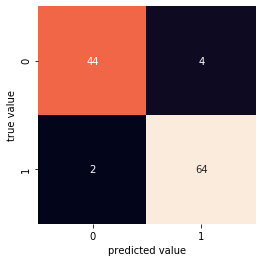

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, predict)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Recall: Bu değeri aslında gerçekten kanser hastası olan kişilerin yüzde kaçını model doğru etiketlemiş ? Yüzde kaçını yakalayamamış ? sorunun cevabını vermektedir. 

f1-score: Bu ölçüt bir nebze de olsa kafa karışıklığını ortadan kaldırmak için precision ve recall skorlarının ortalamasını alarak bir denge skoru üretir.

F1-Score, precision ve recall metriklerinin harmonik ortalaması olarak düşünülebilir.

SVM modelini Digits veri kümesinde Grid Search yöntemini kullanarak oluşturdum.

In [125]:
from sklearn.datasets import load_digits
digits = load_digits()

In [126]:
X = digits.data
X.shape

(1797, 64)

In [127]:
y = digits.target
y.shape

(1797,)

In [165]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc = SVC(kernel='rbf')
model = make_pipeline(svc)

In [186]:
from sklearn.model_selection import GridSearchCV

param_grid= {'svc__C': [1, 5, 10, 50],
             'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=5) #CV=5

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.0005}


In [187]:
model = grid.best_estimator_
y_predict = model.predict(Xtest)

In [188]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest, y_predict)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

Accuracy Score :  98.89%


In [189]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



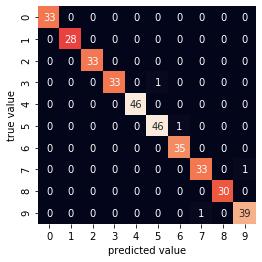

In [190]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_predict)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [191]:
param_grid= {'svc__C': [0.001, 0.1, 100, 10e5],
             'svc__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(model, param_grid, cv=5) #CV=5

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 100, 'svc__gamma': 0.01}


In [192]:
model = grid.best_estimator_
y_predict = model.predict(Xtest)

In [193]:
from sklearn.metrics import accuracy_score
score = accuracy_score(ytest, y_predict)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

Accuracy Score :  81.39%


Task-4D: Please use the same dataset in Task-4C and this time test Decision Tree algorithms again with the grid search algorithm to test different values.

In [237]:
from  sklearn import  datasets
iris=datasets.load_iris()

In [238]:
X=iris.data
y=iris.target

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.5)

In [240]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()

In [241]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()

In [242]:
print(classifier.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [243]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [244]:
predictions=classifier.predict(X_test)

In [245]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.92


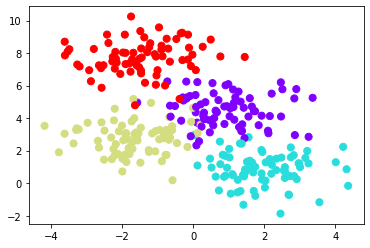

In [246]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');